# Course: Deep Learning
# Author: Sandro Camargo <sandrocamargo@unipampa.edu.br>
# Multilayer Perceptron - Regression Example
# Dataset: https://archive.ics.uci.edu/dataset/186/wine+quality

To open this code in your Google Colab environment, [click here](https://colab.research.google.com/github/Sandrocamargo/deep-learning/blob/master/dl_class03_MLP_WineQuality.ipynb).

Cite: Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.

References:

ROSSO, E. D. S. ; CAMARGO, S. S. . Predição de Qualidade de Vinhos : Um enfoque de Inteligência Artificial. In: XI SIMPÓSIO DA CIÊNCIA DO AGRONEGÓCIO, 2023, Porto Alegre. Anais do XI Cienagro, 2023.

PIRES, A. S. ; TRENTIN, G. ; MORAES, C. C. ; CAMARGO, S. S. . Modelos Computacionais para Predição da Qualidade Sensorial de Vinhos a partir de Características Químicas. In: Computer on The Beach, 2018, Itajaí, SC. Anais do Computer on the Beach, 2018. v. 1. p. 238-247.

# Deep Learning Process Overview

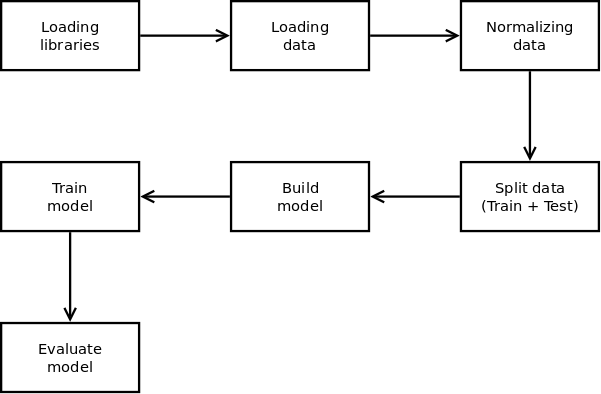

A Python library is a collection of related functions. A library contains bundles of encapsuated code which can be used repeatedly in different programs.

In [ ]:
!pip install ucimlrepo

# Import Libraries
import keras # Neural Network Library
from keras import layers # Layers to a neural network
from keras import optimizers # optimizers
from sklearn.preprocessing import MinMaxScaler
import pandas as pd # Data Manipulation library
import numpy as np # Fast Numeric Computing library
import tensorflow as tf # Optimizers
import matplotlib.pyplot as plt # Plot library
from tensorflow.keras.utils import plot_model # Print the network

Reading the dataset

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

In [ ]:
X.info()

In [ ]:
X.describe()

In [ ]:
y.describe()

In [ ]:
scalerX = MinMaxScaler()
print(scalerX.fit(X))
MinMaxScaler()
X = pd.DataFrame(scalerX.transform(X))

y = y/10

The dataset must be randomly splitted in two parts: training set and testing set. The main approaches to split are holdout and n-fold cross validation.
*   Training set is used for building (training) the model.
*   Testing set is used for testing the generalization ability of the model built.

Moreover, inputs($x$) and outputs($y$) must be splitted in each set.


In [ ]:
np.random.seed(1) # Random numbers will be ever the same
rnd = np.random.rand(len(X)) < 0.8 # Training set will contain 80% of the data

# Creating the training dataset (80%)
train_x = X[rnd]
train_y = y[rnd]

# Creating the testing dataset (20%)
test_x = X[~rnd]
test_y = y[~rnd]

# Verifying dataset dimensions
print('The training dataset (inputs) dimensions are: ', train_x.shape)
print('The training dataset (outputs) dimensions are: ', train_y.shape)
print('The testing dataset (inputs) dimensions are: ', test_x.shape)
print('The testing dataset (outputs) dimensions are: ', test_y.shape)

After creating the datasets, the next step is defining the architecture of our model.

It must be defined:


*   Architecture: in terms of neurons and layers
*   Optimizer: is the algorithm or method used to change the weights in order to minimize the loss function.

The last step is compiling the model. In this step the loss function, the optimizer and the evaluation metrics must be defined.

In [ ]:
# Function to define model architecture
def build_model():
  # Defining the architecture
  # Sequential = Feedforward Neural Network
  # 1 single neuron
  # input_shape is the amount of columns from training set
  model = keras.Sequential([
        layers.Input(shape=[len(train_x.columns)]),
        layers.Dense(2, activation='relu'),
        layers.Dense(2, activation='relu'),
        layers.Dense(1)
  ])

  # Defining the optimizer
  optimizer = tf.keras.optimizers.RMSprop(
      learning_rate = 0.001)

  # Mean Squared Error (MSE) is the default loss function in regression models
  model.compile(loss = 'mse',
      optimizer = optimizer,
      metrics = ['mse','mae'])

  return model

Just for curiosity, you should observe how many parameters ($\theta$) your model has.
At this point, your model is built.

In [ ]:
model = build_model()
model.summary()

After creating the model, it must be trained (fitted).
Training is done using training set and the amount of epochs must be defined.

In [ ]:
EPOCHS = 20

history = model.fit(
    train_x, train_y, validation_split=0.2, epochs = EPOCHS, verbose = 1
)

This plot should be generated just to inspect the learning convergence.
It is expected a decreasing of the loss function value through the epochs.

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Training Error','Validation Error'], loc='upper right')
plt.show()

After the training process, the knowledge learnt by a neural network is stored in its weights.

In [ ]:
weights, biases = model.layers[0].get_weights() # return a numpy list of weights
print(weights)
plt.plot(weights)
plt.ylabel('Weights')
plt.xlabel('Inputs')

In [ ]:
plt.barh(train_x.columns, weights[:,0].astype(float), align='center')
plt.xlabel("Weights")
plt.ylabel("Inputs")
#plt.title(target)
plt.savefig("NN-Weights.png")

After the training process, the model should be tested in order to measure its quality, it means, how good are its predictions. The model must be evaluated using the testing set, which is composed by samples that are not in the training set. In regression problems, the correlation coefficient is the default metric to measure the model quality.
The correlation coefficient is computed using real outputs ($y$) and predicted outputs ($\hat{y}$). Correlation coefficient can vary between 0 (bad predictions) and 1 (perfect predictions).

In [ ]:
test_predictions = model.predict(test_x).flatten() # predict radom activities with the built linear regression model

plt.scatter(test_y, test_predictions, marker = 'o', c = 'blue')
plt.plot([0,10], [0,10], color = 'black', ls = '--')
plt.ylabel('Predictions')
plt.xlabel('Real Values')
plt.title('Linear Regression with MultiLayer Perceptron (Testing Set)')
plt.xlim(test_y.min().iloc[0]-0.1,test_y.max().iloc[0]+0.1)
plt.ylim(test_predictions.min()-0.1,test_predictions.max()+0.1)
plt.axis(True)
plt.show()

output = pd.DataFrame.to_numpy(test_y, copy=True)
print("Correlation Coefficient in testing set: %.4f" % np.corrcoef(test_predictions, np.transpose(output))[0,1])

In [ ]:
train_predictions = model.predict(train_x).flatten() # predict radom activities with the built linear regression model

plt.scatter(train_y, train_predictions, marker = 'o', c = 'blue')
plt.plot([0,10], [0,10], color = 'black', ls = '--')
plt.ylabel('Predictions')
plt.xlabel('Real Values')
plt.title('Linear Regression with MultiLayer Perceptron (Training Set)')
plt.xlim(train_y.min().iloc[0]-0.1, train_y.max().iloc[0]+0.1)
plt.ylim(train_predictions.min()-0.1, train_predictions.max()+0.1)
plt.axis(True)
plt.show()

output = pd.DataFrame.to_numpy(train_y, copy=True)
print("Correlation Coefficient in training set: %.4f" % np.corrcoef(train_predictions, np.transpose(output))[0,1])

In [ ]:
# Save the model architecture as an image
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)